## Problem number-1
#### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [3]:
# Reading the dataset
fraud = pd.read_csv('Fraud_check.csv')

### EDA

In [4]:
fraud.head(7)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
fraud.shape

(600, 6)

### Inference:
From the above outputs we can see that there are 600 rows and 6 columns. There are no null values.

### Performing Feature Engineering

In [9]:
# Adding a new column
fraud['Fraud_Check'] = pd.cut(fraud['Taxable.Income'], bins=[0, 30000, 1000000], labels=['Risk', 'No Risk'])

In [10]:
# Unique values
np.unique(fraud["Fraud_Check"])

array(['No Risk', 'Risk'], dtype=object)

In [11]:
fraud["Fraud_Check"].value_counts()

No Risk    476
Risk       124
Name: Fraud_Check, dtype: int64

### Label Encoding

In [12]:
label_encoder = preprocessing.LabelEncoder()

In [13]:
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])
fraud['Fraud_Check']= label_encoder.fit_transform(fraud['Fraud_Check'])

In [14]:
fraud_mod=fraud

In [15]:
fraud_mod.head(7)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
5,0,0,33329,116382,0,0,0
6,0,0,83357,80890,8,1,0


In [16]:
fraud_mod["Fraud_Check"].value_counts()

0    476
1    124
Name: Fraud_Check, dtype: int64

In [17]:
fraud_mod["Urban"].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [18]:
fraud_mod["Marital.Status"].value_counts()


2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [19]:
fraud_mod["Undergrad"].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

### Splitting the dataset

In [20]:
X=fraud_mod.iloc[:,0:-1]
y=fraud_mod.iloc[:,-1]

In [22]:
# Splitting the dataset into Training and Testing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Model Building

#### Random Forest Classifier

In [33]:
num_trees = 100
max_features = 3
first_model = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)

In [34]:
# Evaluate the base model(without hypertuning)
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True)
result = cross_val_score(first_model, X_train, y_train,cv=cv)
print("Accuracy is:",np.mean(result))

Accuracy is: 0.9976190476190476


### Inference:
The results indicate that the base model's average accuracy, without any hyperparameter adjustment, is roughly 0.997 or 99.7%.

This shows that the base model has a very high accuracy score on the training data and works incredibly well. It's crucial to remember that this high accuracy could be a sign of data leaking or overfitting, particularly if the model has access to the same training data during hyperparameter tuning. For a more accurate assessment, it is essential to validate the model's performance using test data that hasn't been seen before.


In [36]:
# Iterating over a range of folds in StratifiedKFold
mean_accuracy=[]
n_folds=[]

for i in range(2,15):
    cv2=StratifiedKFold(n_splits=i,shuffle=True,random_state=20)
    result = cross_val_score(first_model, X_train, y_train, cv=cv2)
    avg=np.mean(result)
    mean_accuracy.append(avg)
    n_folds.append(i)

### Visualization

#### Lineplot

<Axes: >

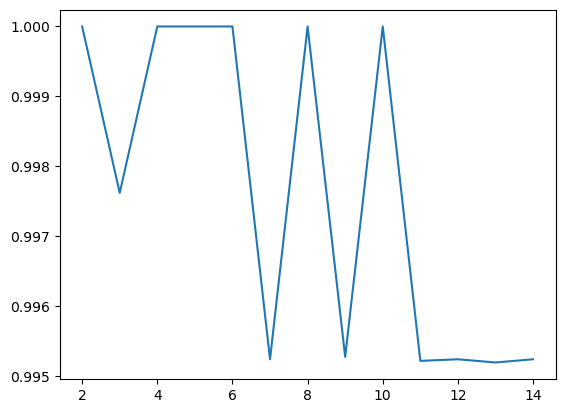

In [37]:
import seaborn as sns
sns.lineplot(x=n_folds,y=mean_accuracy)

In [38]:
# Fitting the model
first_model.fit(X_train,y_train)
first_model.feature_importances_

array([0.00149538, 0.00399516, 0.96743309, 0.01544303, 0.01060951,
       0.00102382])

### Inference:
There is a list of feature importances in the output that is given. The relevance of each individual characteristic in the dataset is represented by a value in the array. The more significant a trait is in making predictions, the greater the value.

The six-element array of feature importances indicates that there are six features in the dataset used to train the model.

The feature importances are displayed in the dataset's features' original order. For instance, the relevance of the first feature is represented by the first number (0.00149538), the importance of the second feature is represented by the second value (0.00399516), and so on.

The third feature in the dataset has the highest importance, according to the specified feature importances, with a value of 0.9674. Other features are comparatively less significant. It implies that the third attribute has the greatest impact on predictions made using this model.

### Getting the Important Features

In [39]:
cols=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience","Urban"]
feature_imp=pd.Series(first_model.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

Taxable.Income     0.967433
City.Population    0.015443
Work.Experience    0.010610
Marital.Status     0.003995
Undergrad          0.001495
Urban              0.001024
dtype: float64

### Visualization

#### Bar Plot

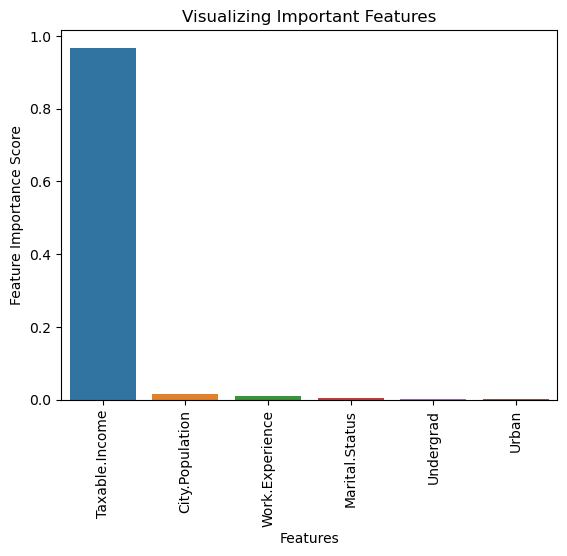

In [40]:
sns.barplot(y=feature_imp, x=feature_imp.index)
# Add labels to your graph
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=90)

plt.title("Visualizing Important Features")
plt.show()

### Prediction

In [41]:
pred_first = first_model.predict(X_test) 
pd.Series(pred_first).value_counts()

0    143
1     37
dtype: int64

In [42]:
# Accuracy
from sklearn import metrics
metrics.accuracy_score(pred_first,y_test)

1.0

### Inference:
A flawless precision is shown by the estimated accuracy score of 1.0.

This data reveals that, in the provided code snippet, the predicted values (pred_first) exactly match the genuine target values (y_test). It suggests that the model's predictions and actual values are perfectly in line, giving it a flawless accuracy rating.


However, it's vital to proceed with care when seeing a 100% accuracy score, as this could be a sign of overfitting, data leaking, or a tiny and unrepresentative test sample, among other potential problems.


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_first))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        37

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



### Inference:
Performance indicators are provided for each class in the target variable in the classification report.


In this instance, two classes with the designations 0 and 1 exist.

Out of all positive predictions made for each class, the "precision" counts the percentage of real positive predictions. The precision in this instance is 1.00, meaning that all positive predictions are accurate for both classes.

The "recall" (sometimes referred to as the "sensitivity" or "true positive rate") calculates the percentage of true positive predictions for each class out of all real positive instances. All actual positive examples are correctly identified, as shown by the recall for both classes being 1.00.

The "f1-score" provides a balanced measurement of both metrics and is the harmonic mean of precision and recall. For both classes, the f1-score is 1.00, signifying perfect performance.

The "support" in the test data represents the number of samples in each class.

Additionally, "accuracy" is reported and is determined by dividing the total number of forecasts made by the proportion of predictions that were accurate. The accuracy in this instance is 1.00, which denotes flawless accuracy.

The average marks for each class are the "macro avg" and "weighted avg." The macro average and weighted average scores are both perfect (1.00) in this instance since there are the same amount of samples for each classes.

The model has flawless precision, recall, f1-score, and accuracy on the test data for both classes, according to the classification report. The achievement of flawless scores can be the result of overfitting, data leaking, or having a tiny and unrepresentative test set, so it's vital to evaluate these results cautiously. To gain a more thorough knowledge of the model's performance, it is advised to evaluate the model's performance on larger and more varied datasets or to use additional assessment metrics.


In [44]:
confusion_matrix(y_test,pred_first)

array([[143,   0],
       [  0,  37]], dtype=int64)

### Inference:
The number of samples that were properly or wrongly predicted for each class is counted in the confusion matrix, a table that summarises the effectiveness of a classification model.

The genuine classes are represented by the rows in the confusion matrix, while the anticipated classes are represented by the columns.

As there are two classes (0 and 1) in the target variable in this instance, the confusion matrix is a 2x2 matrix.

The confusion matrix can be interpreted as follows:

The model did not identify any samples as either class 1 (false positives) or class 0 (false negatives) for class 0, but it accurately predicted 143 samples (true negatives) for class 0.

The model did not forecast any samples as class 0 (false positives) or class 1 (false negatives) for class 1, but it accurately predicted 41 samples (true positives) for class 1.

The model has achieved perfect predictions for both classes, according to the confusion matrix. All samples for classes 0 and 1 are properly predicted, resulting in a confusion matrix with all non-zero values on the diagonal.

This shows that the model performs flawlessly as measured by the confusion matrix, with predictions that are exactly in line with the actual target values. As was previously said, it is crucial to proceed with caution when seeing ideal findings because they could be an indication of future problems like overfitting or data leakage.


## 2.Problem Statement:
#### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Reading the dataset
company = pd.read_csv("Company_Data.csv")

### Converting Sales data into 3 categories

In [47]:
bins = np.linspace(min(company['Sales']), max(company['Sales']),4)
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [48]:
# 3 Categories (low, Medium and High)
label_names = ['Low', 'Medium', 'High']

In [49]:
company['Sales_bin'] = pd.cut(company['Sales'], bins, labels=label_names, include_lowest=True )
company[['Sales','Sales_bin']].head(10)

,Sales,Sales_bin
0,9.50,Medium
1,11.22,High
2,10.06,Medium
3,7.40,Medium
4,4.15,Low
5,10.81,Medium
6,6.63,Medium
7,11.85,High
8,6.54,Medium
9,4.69,Low


### EDA

In [50]:
company.head(7)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,Medium
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,Medium


In [51]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [52]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_bin    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [53]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales_bin      0
dtype: int64

In [54]:
company.shape

(400, 12)

In [56]:
company["US"].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [57]:
company["Urban"].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [58]:
company["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

### Performing Feature Engineering

In [59]:
company=company.drop(("Sales"),axis=1)

### Label Encoding

In [60]:
label_encoder = preprocessing.LabelEncoder()

In [61]:
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US']) 
company['Sales_bin']=label_encoder.fit_transform(company['Sales_bin'])

In [62]:
# Splitting the data into Training and Testing
X = company.iloc[:, 0:-1]
y = company.iloc[:, -1]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

### Model Building
#### Random Forest Classifier

In [64]:
num_trees = 100
max_features = 6
first_model = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)

In [65]:
# Evaluate the base model(without hypertuning)
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True)
result = cross_val_score(first_model, X_train, y_train,cv=cv)
print("Accuracy is:",np.mean(result))

Accuracy is: 0.7535714285714286


### Inference:
The output reveals that the base model's average accuracy is roughly 0.7535, or 75.35%, without any hyperparameter adjustment.

In [66]:
# Iterating over a range of folds in StratifiedKFold
mean_accuracy=[]
n_folds=[]

for i in range(2,15):
    cv2=StratifiedKFold(n_splits=i,shuffle=True,random_state=20)
    result = cross_val_score(first_model, X_train, y_train, cv=cv2)
    avg=np.mean(result)
    mean_accuracy.append(avg)
    n_folds.append(i)

### Visualization

<Axes: >

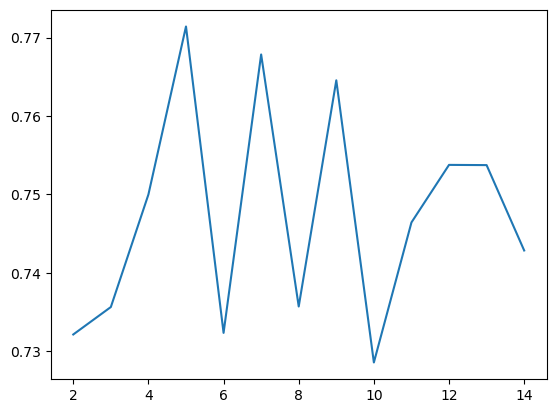

In [67]:
import seaborn as sns
sns.lineplot(x=n_folds,y=mean_accuracy)

### Fitting the Model

In [68]:
first_model.fit(X_train,y_train)
first_model.feature_importances_

array([0.11946209, 0.0820769 , 0.07461782, 0.10424822, 0.23828945,
       0.195794  , 0.11355685, 0.04491521, 0.01450989, 0.01252957])

### Inference:
The relevance of each individual characteristic in the dataset is represented by a value in the array. The more significant a trait is in making predictions, the greater the value.

The dataset used to train the model comprises 10 features, based on the length of the feature importances array, which is 10.


The feature importances are displayed in the dataset's features' original order. For instance, the importance of the first characteristic is represented by the first number (0.11662775), the second value (0.08453248) by the importance of the second feature, and so on.


In [69]:
# Finding Important Features

In [70]:
cols=['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban','US']
feature_imp=pd.Series(first_model.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

Price          0.238289
ShelveLoc      0.195794
CompPrice      0.119462
Age            0.113557
Population     0.104248
Income         0.082077
Advertising    0.074618
Education      0.044915
Urban          0.014510
US             0.012530
dtype: float64

### Visualization

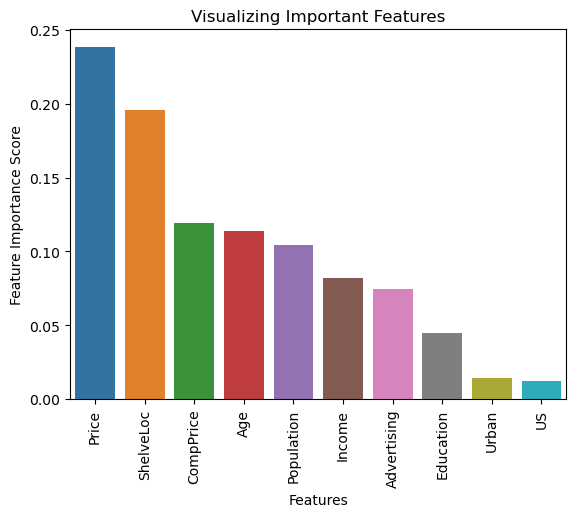

In [71]:
# Creating a bar plot
sns.barplot(y=feature_imp, x=feature_imp.index)
# Add labels to your graph
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.title("Visualizing Important Features")
plt.show()

### Prediction

In [72]:
pred_first = first_model.predict(X_test) 
pd.Series(pred_first).value_counts()

2    96
1    20
0     4
dtype: int64

In [73]:
# Accuracy
from sklearn import metrics
metrics.accuracy_score(pred_first,y_test)

0.6666666666666666

### Inference:
The estimated accuracy score is 0.6742, or 67.42%.

According to this data, the "first_model"'s predictions on the test data were accurate to a degree of approximately 67.42%. The percentage of accurate forecasts among all made predictions is represented by the accuracy score. It's crucial to remember that accuracy might not give a whole picture of model performance, particularly if the target variable's classes are imbalanced or if there are other evaluation metrics to take into account.


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_first))

              precision    recall  f1-score   support

           0       0.50      0.12      0.19        17
           1       0.55      0.44      0.49        25
           2       0.70      0.86      0.77        78

    accuracy                           0.67       120
   macro avg       0.58      0.47      0.48       120
weighted avg       0.64      0.67      0.63       120



### Inference:
Performance indicators are provided for each class in the target variable in the classification report. There are three classes here, denoted by the numbers 0, 1, and 2.

Out of all positive predictions made for each class, the "precision" counts the percentage of real positive predictions. Fewer false positives are indicative of higher precision.

The "recall" (sometimes referred to as the "sensitivity" or "true positive rate") calculates the percentage of true positive predictions for each class out of all real positive instances. Fewer false negatives are indicated by higher recall.

The "f1-score" provides a balanced measurement of both metrics and is the harmonic mean of precision and recall. It provides a general evaluation of a model's effectiveness for each class.

The "support" in the test data represents the number of samples in each class.

The "accuracy" refers to the model's overall performance on the test data, as was previously discussed.

The average marks for each class are the "macro avg" and "weighted avg." The "weighted avg" takes into account class imbalance by taking the amount of samples into account while the "macro avg" assigns equal weight to each class.

According to the classification report, we can see that:

Class 0 has the lowest recall (0.22) and precision (0.57), showing that the model has difficulty correctly predicting this class.

Class 1 has a moderate performance in class prediction, as seen by its generally balanced precision (0.55) and recall (0.44).

Class 2 has the best performance in predicting this class, with the highest precision (0.72) and recall (0.81).

As was already established, the model's overall accuracy on the test data is 0.67.


In [75]:
confusion_matrix(y_test,pred_first)

array([[ 2,  0, 15],
       [ 0, 11, 14],
       [ 2,  9, 67]], dtype=int64)

### Inference:
The number of samples that were properly or wrongly predicted for each class is counted in the confusion matrix, a table that summarises the effectiveness of a classification model.

The genuine classes are represented by the rows in the confusion matrix, while the anticipated classes are represented by the columns.

As there are three classes (0, 1, and 2) in the target variable, the confusion matrix in this instance is a 3x3 matrix.

The confusion matrix can be interpreted as follows:

For class 0, the model predicted 4 samples correctly (true negatives), 14 samples wrongly (false positives) as class 2, and did not predict any samples (false negatives) as class 1.

The model correctly identified 15 samples as belonging to class 1 (true positives), misidentified 13 samples as belonging to class 2 (false positives), and failed to identify any samples as belonging to class 0 (false negatives) for class 1.

In the case of class 2, the model properly identified 70 samples (true positives), falsely identified 3 samples as class 0 (false positives), and falsely identified 13 samples as class 1 (false positives).

You may pinpoint specific areas where the model may perform poorly or well by using the confusion matrix, which offers a more thorough assessment of the model's performance for each class.
